In [76]:
from PIL import Image # used for loading images
import numpy as np
import os # used for navigating to image path
import imageio # used for writing images
import random
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
import pydot

In [4]:
def getImageOneHotVector(image_file_name, num_classes=2):
    """Returns one-hot vector encoding for each image for binary or ternary classification"""
    word_label = image_file_name.split('-')[0]
    if num_classes == 2:
        if word_label == 'probable' : 
            return np.array([1, 0])
        elif word_label == 'improbable' : 
            return np.array([0, 1])
    elif num_classes == 3:
        if word_label == 'probable' : 
            return np.array([1, 0, 0])
        elif word_label == 'possible' : 
            return np.array([0, 1, 0])    
        elif word_label == 'improbable':
            return np.array([0, 0, 1])

In [2]:
3024/13.5

224.0

In [43]:
#IMG_SIZE = 300
DIR = '../../data/tidy/labeled_images_2_classes'
def processImageData(img_size, l=400,t=0,r=3424,b=3024):    
    data = []
    image_list = os.listdir(DIR)
    for img in image_list:
        label = getImageOneHotVector(img)
        path = os.path.join(DIR, img)
        img = Image.open(path)
        img = img.convert('L') # convert image to monochrome 
        #print(img.size)
        img = img.crop((l, t, r, b)) # after cropping, image size is 3024 x 3024 pixels
        img_size_w, img_size_h = img.size
        #print(img_size_w)
        #img_size = int(img_size_w/28)    #28     
        img = img.resize((img_size, img_size), Image.BICUBIC)
        data.append([(np.array(img)/255.).T, label])#scale to 0-1 and transpose
#     # Basic Data Augmentation - Horizontal Flipping
#     flip_img = Image.open(path)
#     flip_img = flip_img.convert('L')
#     flip_img = flip_img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
#     flip_img = np.array(flip_img)
#     flip_img = np.fliplr(flip_img)
#     train_data.append([flip_img, label])  
#    shuffle(train_data)
    return (data)

def splitData(image_array, prop = 0.80):
    """Returns training and test arrays of images with specified proportion - prop:1-prop"""
    random.shuffle(image_array)
    train_size = int(prop*np.shape(image_array)[0])
    train = image_array[:train_size]
    test = image_array[train_size:]
    return(train, test)

In [49]:
processed_image_data = processImageData(108)
train_data, test_data = splitData(processed_image_data)

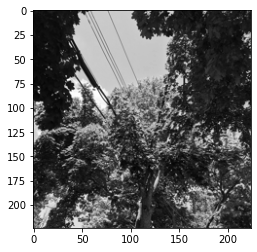

In [8]:
plt.imshow(processed_image_data[0][0], cmap = 'gist_gray')

In [50]:
input_image_shape = np.array([np.expand_dims(x[0],axis=2) for x in train_data]).shape[1:4]
print(input_image_shape)

(224, 224, 1)


In [18]:
289/32

9.03125

In [80]:
model = models.Sequential([
    layers.Conv2D(filters = 64, kernel_size = 7, strides = 2, activation="relu", padding="same", input_shape = input_image_shape),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, 3, activation="relu", padding="same"),
    layers.Conv2D(128, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(2),
    layers.Conv2D(256, 3, activation="relu", padding="same"),
    layers.Conv2D(256, 3, activation="relu", padding="same"),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2, activation="softmax")
])

# model = Sequential()
# model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# #model.add(Dropout(0.3))
# model.add(Dense(2, activation = 'softmax'))

# Compile the model.
opt = SGD(lr = 0.001) #default learning rate (lr) = 0.1
model.compile(loss='categorical_crossentropy',  optimizer = "adam",# metrics=[ 'accuracy'])
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.SpecificityAtSensitivity(0.5), tf.keras.metrics.SensitivityAtSpecificity(0.5), 'accuracy']) #metrics=['accuracy'])

In [81]:
# Train the model.
model.fit(
    np.array([np.expand_dims(x[0],axis=2) for x in train_data]), # images
    np.array([x[1] for x in train_data]), # labels
    batch_size = 32,
    epochs = 4,
    validation_data=(
        np.array([np.expand_dims(x[0],axis=2) for x in test_data]), 
        np.array([x[1] for x in test_data])),
)

Epoch 1/4
12/12 [==============================] - 19s 2s/step - loss: 0.7175 - precision_2: 0.5956 - recall_2: 0.5956 - specificity_at_sensitivity_2: 0.7104 - sensitivity_at_specificity_2: 0.7104 - accuracy: 0.5956 - val_loss: 0.6402 - val_precision_2: 0.7065 - val_recall_2: 0.7065 - val_specificity_at_sensitivity_2: 0.7826 - val_sensitivity_at_specificity_2: 0.7826 - val_accuracy: 0.7065
Epoch 2/4
12/12 [==============================] - 16s 1s/step - loss: 0.6669 - precision_2: 0.7022 - recall_2: 0.7022 - specificity_at_sensitivity_2: 0.7568 - sensitivity_at_specificity_2: 0.7568 - accuracy: 0.7022 - val_loss: 0.6419 - val_precision_2: 0.7065 - val_recall_2: 0.7065 - val_specificity_at_sensitivity_2: 0.7717 - val_sensitivity_at_specificity_2: 0.7717 - val_accuracy: 0.7065
Epoch 3/4
12/12 [==============================] - 15s 1s/step - loss: 0.6457 - precision_2: 0.6776 - recall_2: 0.6776 - specificity_at_sensitivity_2: 0.7650 - sensitivity_at_specificity_2: 0.7650 - accuracy: 0.677

In [ ]:
#loss, acc = model.evaluate(testImages, testLabels, verbose = 0)
#print(acc * 100)

In [79]:
help(model.compile)

Help on method compile in module tensorflow.python.keras.engine.training:

compile(optimizer='rmsprop', loss=None, metrics=None, loss_weights=None, weighted_metrics=None, run_eagerly=None, **kwargs) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Configures the model for training.
    
    Arguments:
        optimizer: String (name of optimizer) or optimizer instance. See
          `tf.keras.optimizers`.
        loss: String (name of objective function), objective function or
          `tf.keras.losses.Loss` instance. See `tf.keras.losses`. An objective
          function is any callable with the signature `loss = fn(y_true,
          y_pred)`, where y_true = ground truth values with shape =
          `[batch_size, d0, .. dN]`, except sparse loss functions such as sparse
          categorical crossentropy where shape = `[batch_size, d0, .. dN-1]`.
          y_pred = predicted values with shape = `[batch_size, d0, .. dN]`. It
          returns a weighted loss

In [75]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
